# v0.16.x
March 2015

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
pd.options.display.max_rows=12
pd.options.display.width=80
pd.options.display.max_categories=4
%matplotlib inline

## assign & pipe

In [2]:
df = pd.read_csv('data/iris.csv',index_col=False)
df.columns = df.columns.str.replace('\s+','_').str.lower()
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
...,...,...,...,...,...
144,6.7,3.3,5.7,2.5,virginica
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica


In [3]:
(df.assign(sepal_ratio = df['sepal_width'] / df['sepal_length'])
   .head()
)

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_ratio
0,5.1,3.5,1.4,0.2,setosa,0.686275
1,4.9,3.0,1.4,0.2,setosa,0.612245
2,4.7,3.2,1.3,0.2,setosa,0.680851
3,4.6,3.1,1.5,0.2,setosa,0.673913
4,5.0,3.6,1.4,0.2,setosa,0.720000


In [4]:
df2 = df.copy()
df2['sepal_ratio'] = df['sepal_width'] / df['sepal_length']
df2.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_ratio
0,5.1,3.5,1.4,0.2,setosa,0.686275
1,4.9,3.0,1.4,0.2,setosa,0.612245
2,4.7,3.2,1.3,0.2,setosa,0.680851
3,4.6,3.1,1.5,0.2,setosa,0.673913
4,5.0,3.6,1.4,0.2,setosa,0.720000


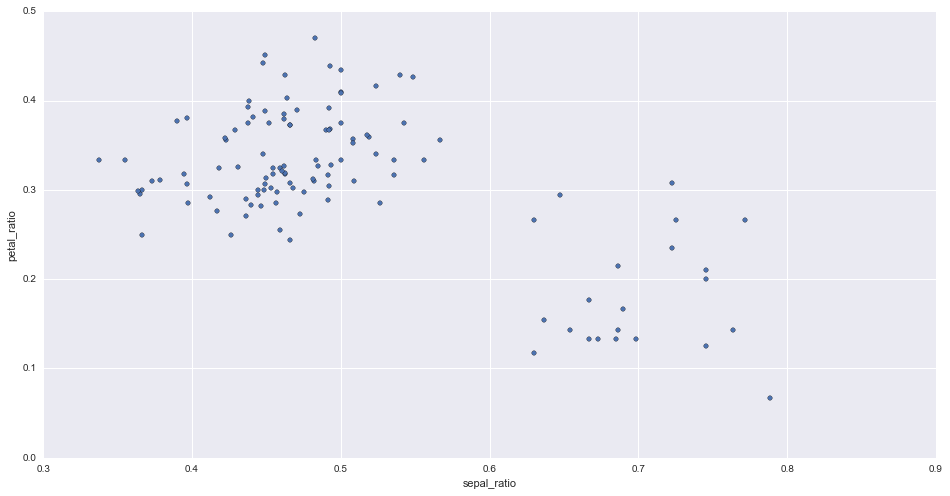

In [5]:
(df
   .query('sepal_length > 5')
   .assign(sepal_ratio = lambda x: x.sepal_width / x.sepal_length,
           petal_ratio = lambda x: x.petal_width / x.petal_length)
   .plot
   .scatter(x='sepal_ratio', y='petal_ratio', figsize=(16,8))
)

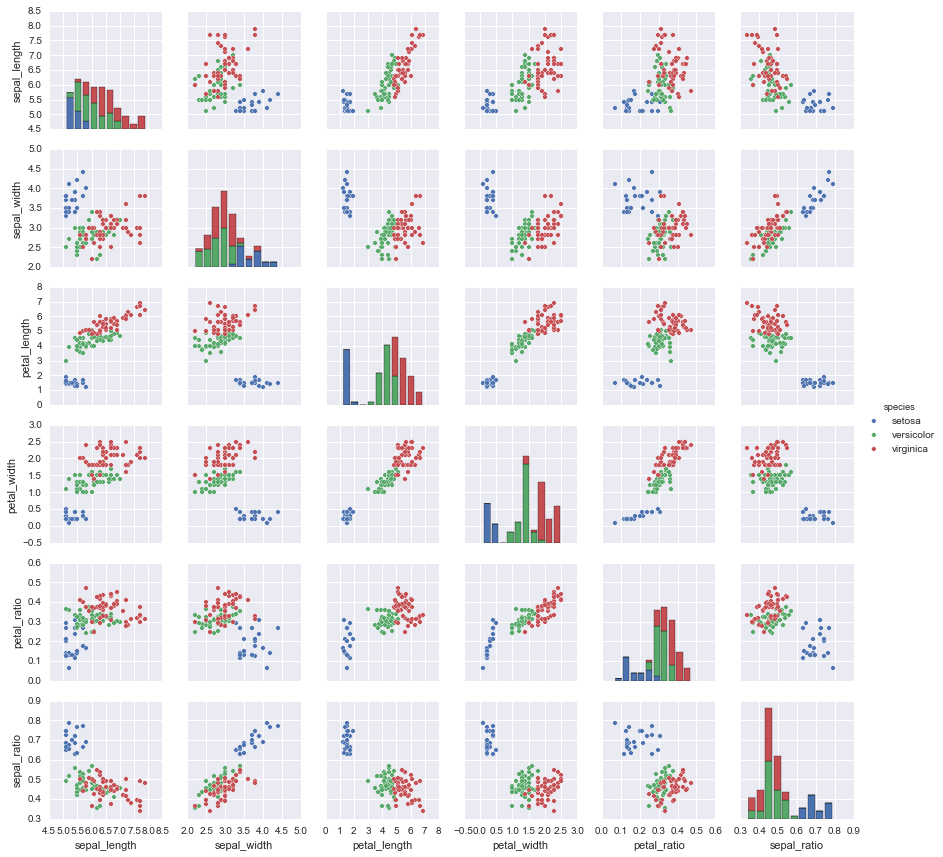

In [20]:
(df
   .query('sepal_length > 5')
   .assign(sepal_ratio = lambda x: x.sepal_width / x.sepal_length,
           petal_ratio = lambda x: x.petal_width / x.petal_length)
   .pipe(sns.pairplot, hue='species', size=2)
)

# sample

In [7]:
df.sample(n=20)

,sepal_length,sepal_width,petal_length,petal_width,species
11,4.8,3.4,1.6,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
0,5.1,3.5,1.4,0.2,setosa
80,5.5,2.4,3.8,1.1,versicolor
63,6.1,2.9,4.7,1.4,versicolor
14,5.8,4.0,1.2,0.2,setosa
...,...,...,...,...,...
64,5.6,2.9,3.6,1.3,versicolor
70,5.9,3.2,4.8,1.8,versicolor
21,5.1,3.7,1.5,0.4,setosa


In [8]:
# train, test
train = df.sample(frac=0.10)
test = df.loc[df.index.difference(train.index)]

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 139 to 53
Data columns (total 5 columns):
sepal_length    15 non-null float64
sepal_width     15 non-null float64
petal_length    15 non-null float64
petal_width     15 non-null float64
species         15 non-null object
dtypes: float64(4), object(1)
memory usage: 720.0+ bytes


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    135 non-null float64
sepal_width     135 non-null float64
petal_length    135 non-null float64
petal_width     135 non-null float64
species         135 non-null object
dtypes: float64(4), object(1)
memory usage: 6.3+ KB


# CategoricalIndex

In [11]:
r = (df
       .assign(species = df.species.astype('category'))
       .set_index('species')
     )
r

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.1,3.5,1.4,0.2
setosa,4.9,3.0,1.4,0.2
setosa,4.7,3.2,1.3,0.2
setosa,4.6,3.1,1.5,0.2
setosa,5.0,3.6,1.4,0.2
setosa,5.4,3.9,1.7,0.4
...,...,...,...,...
virginica,6.7,3.3,5.7,2.5
virginica,6.7,3.0,5.2,2.3


In [12]:
r.index

CategoricalIndex([u'setosa', u'setosa', u'setosa', u'setosa', u'setosa',
                  u'setosa', u'setosa', u'setosa', u'setosa', u'setosa',
                  ...
                  u'virginica', u'virginica', u'virginica', u'virginica',
                  u'virginica', u'virginica', u'virginica', u'virginica',
                  u'virginica', u'virginica'],
                 categories=[u'setosa', u'versicolor', u'virginica'], ordered=False, name=u'species', dtype='category', length=150)

In [13]:
r.index.codes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int8)

In [14]:
r.index.categories

Index([u'setosa', u'versicolor', u'virginica'], dtype='object')

In [15]:
res = (r
        .groupby(level='species')
        .sepal_width
        .agg({'mean' : 'mean', 'std' : 'std'})
       )
res

,std,mean
species,,
setosa,0.381024,3.418
versicolor,0.313798,2.770
virginica,0.322497,2.974


In [16]:
res.index

CategoricalIndex([u'setosa', u'versicolor', u'virginica'], categories=[u'setosa', u'versicolor', u'virginica'], ordered=False, name=u'species', dtype='category')